In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re

In [16]:
PATH = 'C:/Users/davin/Downloads/'

car  = PATH + '자동차등록(월별_구별)_20230323151206.csv'
car_now = PATH + '자동차_현황.csv'
parking = PATH + '주차장(동별)(2016년+이후)_20230323162553.csv'
per_in = PATH + '20230323180152_강서구_2018-2022_데이터랩_다운로드/20230323180152_인기관광지_현지인.csv'
per_out = PATH + '20230323180152_강서구_2018-2022_데이터랩_다운로드/20230323180152_인기관광지_외지인.csv'
parking_lot = PATH + '주차장(동별)(2016년+이후)_20230323230147.csv'

In [6]:
car_df = pd.read_csv(car, encoding='utf8')
car_df[['자치구별(2)','2023. 02']].head()

,자치구별(2),2023. 02
0,자치구별(2),합계
1,자치구별(2),소계
2,자치구별(2),계
3,소계,3191681
4,종로구,50971


In [32]:
car_df[car_df['자치구별(2)'] == '강서구'][['자치구별(2)', '2022. 12', '2023. 01', '2023. 02']]

,자치구별(2),2022. 12,2023. 01,2023. 02
19,강서구,207536,206811,206082


In [97]:
car_df[['자치구별(2)','2023. 02']][4:29].head()

,자치구별(2),2023. 02
4,종로구,50971
5,중구,57822
6,용산구,75553
7,성동구,103707
8,광진구,97950


<BarContainer object of 25 artists>

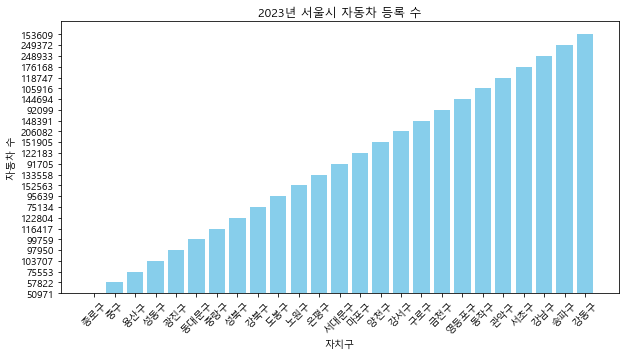

In [99]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 5))
plt.title('2023년 서울시 자동차 등록 수')
plt.xlabel('자치구')
plt.ylabel('자동차 수')
plt.xticks(rotation=45)
plt.bar(car_df['자치구별(2)'][4:29], car_df['2023. 02'][4:29], color='skyblue')

In [96]:
car_now_df = pd.read_csv(car_now, encoding='cp949')
car_now_df[['시군구', '2023.02 월']].sort_values(by=['2023.02 월'],ascending=False).head()

,시군구,2023.02 월
17,송파구,249372
0,강남구,248933
3,강서구,206082
14,서초구,176168
1,강동구,153609


<BarContainer object of 25 artists>

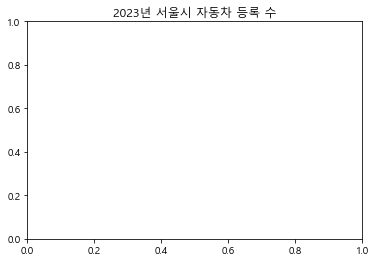

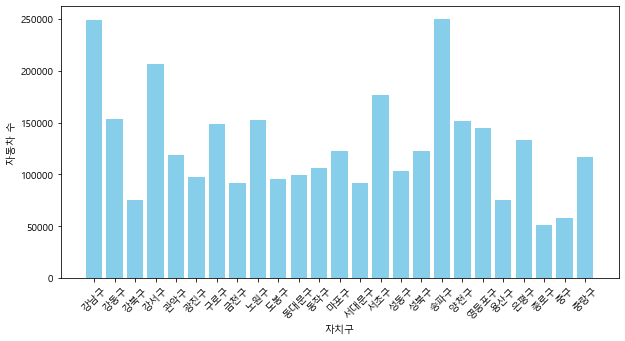

In [46]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('2023년 서울시 자동차 등록 수')
plt.figure(figsize=(10, 5))
plt.xlabel('자치구')
plt.ylabel('자동차 수')
plt.xticks(rotation=45)
plt.bar(car_now_df['시군구'], car_now_df['2023.02 월'], color='skyblue')

In [7]:
parking_df = pd.read_csv(parking, encoding='utf8')
parking_df[['동별(2)', '합계.1']][3:].head()

,동별(2),합계.1
3,종로구,92062
4,중구,109153
5,용산구,118632
6,성동구,134544
7,광진구,134389


In [8]:
parking_df['합계.1'][3:] = pd.to_numeric(parking_df['합계.1'][3:])
parking_df[['동별(2)', '합계.1']][3:].sort_values(by=['합계.1'],ascending=False).head()

,동별(2),합계.1
25,강남구,413898
26,송파구,339227
18,강서구,315812
24,서초구,310949
27,강동구,209959


<BarContainer object of 25 artists>

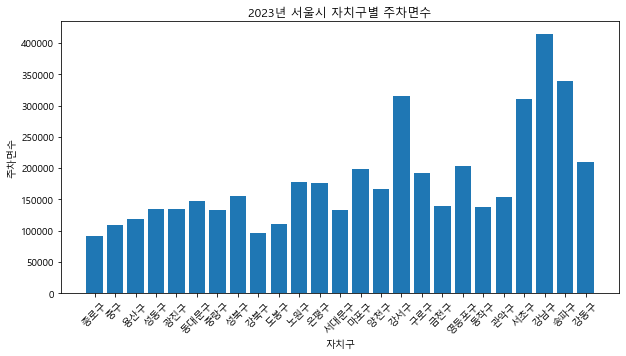

In [9]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 5))
plt.title('2023년 서울시 자치구별 주차면수')
plt.xlabel('자치구')
plt.ylabel('주차면수')
plt.xticks(rotation=45)
plt.bar(parking_df['동별(2)'][3:], parking_df['합계.1'][3:])

In [30]:
parking_lot_df = pd.read_csv(parking_lot, encoding='utf8')
parking_lot_df[parking_lot_df['동별(2)'] == '강서구'][['동별(2)', '소계', '소계.1', '공영', '공영.1', '민영', '민영.1']].head()

,동별(2),소계,소계.1,공영,공영.1,민영,민영.1
16,강서구,17639,315812,665,8895,16974,306917


In [36]:
gong = [17639, 665, 8895]
miny = [315812, 16974, 306917]
jucha = ['합계','개수', '면수']
df = pd.DataFrame({'공영' : gong, '민영' : miny}, index = jucha)
df

,공영,민영
합계,17639,315812
개수,665,16974
면수,8895,306917


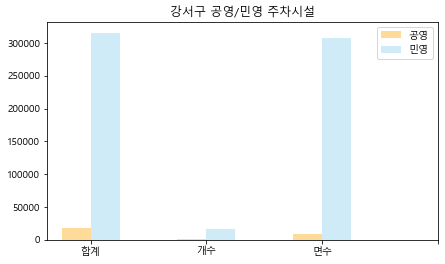

In [54]:
fig, ax = plt.subplots(figsize=(7,4))
bar_width = 0.25

index = np.arange(len(jucha))
plt.bar(index + bar_width * 0.5, df['공영'], bar_width, alpha=0.4, color='orange', label='공영')
plt.bar(index + bar_width * 1.5, df['민영'], bar_width, alpha=0.4, color='skyblue', label='민영')

plt.title('강서구 공영/민영 주차시설')
plt.xticks(np.arange(bar_width, 4 + bar_width, 1), jucha)
plt.legend()
plt.show()

In [112]:
per_in_df = pd.read_csv(per_in, encoding='cp949')
per_out_df = pd.read_csv(per_out, encoding='cp949')
per_in_df[['관광지명', '분류', '현지인 검색 수']]

,관광지명,분류,현지인 검색 수
0,김포국제공항국내선,교통시설,362971
1,롯데몰김포공항점,쇼핑몰,293749
2,이마트가양점,대형마트,236475
3,NC백화점강서점,백화점,216307
4,김포국제공항,교통시설,204730
...,...,...,...
95,강서구민회관우장홀,공연시설,1001
96,리버파크관광호텔,호텔,993
97,BJ호텔,모텔,973
98,미타사,종교성지,956


In [113]:
per_out_df[['관광지명', '분류', '외지인 검색 수']]

,관광지명,분류,외지인 검색 수
0,김포국제공항국내선,교통시설,4520784
1,김포국제공항,교통시설,2101877
2,롯데몰김포공항점,쇼핑몰,1435813
3,강서농산물도매시장,시장,706491
4,NC백화점강서점,백화점,624324
...,...,...,...
95,모텔플라워,모텔,3454
96,바나나롤러스케이트장,육상레저스포츠,3430
97,봉봉키즈카페강서점,테마공원,3424
98,호텔딘,모텔,3343


In [137]:
a = sum(per_in_df['현지인 검색 수'])
b = sum(per_out_df['외지인 검색 수'])
c = a+b
print(a, b)
print(a/c*100)
print(b/c*100)
print(a/c*100+b/c*100)

2544514 13924281
15.450517175057435
84.54948282494257
100.0


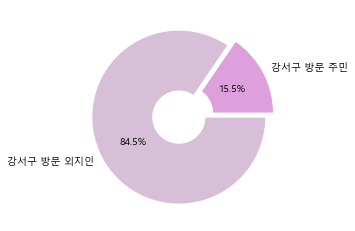

In [136]:
ratio = [a/c*100,b/c*100]
labels = ['강서구 방문 주민', '강서구 방문 외지인']
colors = ['plum', 'thistle']
explode = [0.05, 0.05]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

plt.pie(ratio, labels=labels, autopct='%.1f%%', explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

In [139]:
per_in_df[['분류', '관광지명']]

,분류,관광지명
0,교통시설,김포국제공항국내선
1,쇼핑몰,롯데몰김포공항점
2,대형마트,이마트가양점
3,백화점,NC백화점강서점
4,교통시설,김포국제공항
...,...,...
95,공연시설,강서구민회관우장홀
96,호텔,리버파크관광호텔
97,모텔,BJ호텔
98,종교성지,미타사


In [143]:
per_in_df['방문자 분류'] = '주민'
per_out_df['방문자 분류'] = '외지인'

In [150]:
merge_per_inout = pd.concat([per_in_df, per_out_df])
merge_per_inout[['분류', '방문자 분류']]

,분류,방문자 분류
0,교통시설,주민
1,쇼핑몰,주민
2,대형마트,주민
3,백화점,주민
4,교통시설,주민
...,...,...
95,모텔,외지인
96,육상레저스포츠,외지인
97,테마공원,외지인
98,모텔,외지인


In [163]:
per_in_bun = {}
for i in list(set(per_in_df['분류'])):
    per_in_bun[i] = len(per_in_df[per_in_df['분류'] == i])
per_in_bun

{'공연시설': 8,
 '대형마트': 4,
 '레저스포츠시설': 2,
 '종교성지': 8,
 '역사유적지': 1,
 '호텔': 20,
 '모텔': 20,
 '백화점': 2,
 '호스텔': 1,
 '육상레저스포츠': 3,
 '쇼핑몰': 1,
 '시장': 8,
 '테마공원': 7,
 '전시시설': 4,
 '교통시설': 4,
 '도시공원': 7}

In [194]:
list(per_in_bun.keys())

['공연시설',
 '대형마트',
 '레저스포츠시설',
 '종교성지',
 '역사유적지',
 '호텔',
 '모텔',
 '백화점',
 '호스텔',
 '육상레저스포츠',
 '쇼핑몰',
 '시장',
 '테마공원',
 '전시시설',
 '교통시설',
 '도시공원']

In [166]:
per_out_bun = {}
for i in list(set(per_out_df['분류'])):
    per_out_bun[i] = len(per_out_df[per_out_df['분류'] == i])
per_out_bun

{'공연시설': 7,
 '대형마트': 4,
 '랜드마크관광': 1,
 '레저스포츠시설': 2,
 '종교성지': 5,
 '역사유적지': 1,
 '호텔': 23,
 '모텔': 23,
 '백화점': 2,
 '호스텔': 1,
 '육상레저스포츠': 3,
 '쇼핑몰': 1,
 '시장': 8,
 '테마공원': 7,
 '전시시설': 4,
 '교통시설': 3,
 '도시공원': 5}

In [210]:
idx = []
count = 0
for i in range(len(per_out_bun)):
    idx.append(i+1+count)
    count += 1

idx2 = []
count = 0
for i in range(len(per_out_bun)):
    idx2.append(i+2+count)
    count += 1
print(idx)
print(idx2)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34]


In [220]:
idx = np.arange(200)

<BarContainer object of 16 artists>

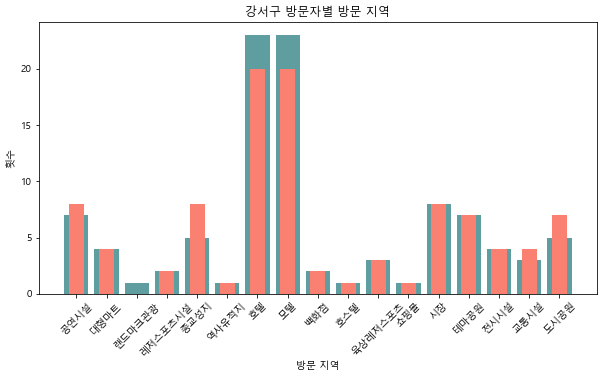

In [230]:
w = 0.25

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 5))
plt.title('강서구 방문자별 방문 지역')
plt.xlabel('방문 지역')
plt.ylabel('횟수')
plt.xticks(rotation=45)
plt.bar(per_out_bun.keys(), per_out_bun.values(), color='cadetblue', label='외지인')
plt.bar(per_in_bun.keys(), per_in_bun.values(), color='salmon', width = 0.5, label='강서구 주민')

In [227]:
idx = np.arange(200)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 5))
plt.title('강서구 방문자별 방문 지역')

w = 0.25
plt.bar(idx-w, per_out_bun.values(), color='cadetblue', label='외지인')
plt.bar(idx+w, per_in_bun.values(), color='salmon', label='강서구 주민')

plt.xlabel('방문 지역')
plt.ylabel('횟수')

plt.xticks(idx, rotation=45, [per_in_bun.keys()])
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-227-dd41246cc492>, line 14)